<h1> AWS and Machine Learning </h1>

> Data Cleaning - Strategies for Missing Values - Imputing Time Series Data


GitHub Link: https://github.com/data-analytics-professionals

In [1]:
# Set the Jyputer Notebook, width: 100% 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

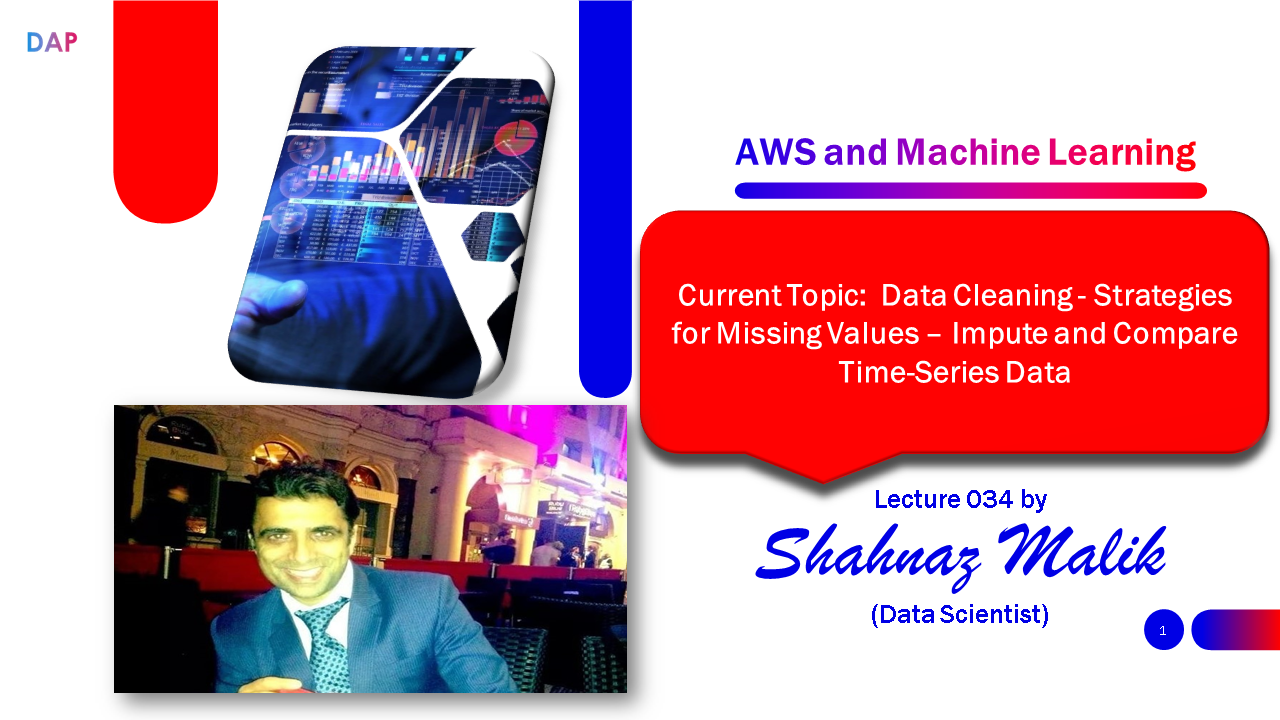

In [2]:
from IPython.display import Image
cover = Image(filename="../project_environment/photos/Impute_and_Compare_Time_Series_Data.png")
display(cover)

> > Data Acquisition 

In [3]:
# Load the libraries (numpy, pandas) for data analysis and data wrangling
import numpy as np
import pandas as pd

# Read the dataset 'air-quality.xls'
df = pd.read_csv('data/air_quality.csv', parse_dates=['Date'], index_col='Date')

In [4]:
# Sample function return a random sample of n items from an axis of object.
df.sample(n=10)

,Ozone,Solar,Wind,Temp
Date,,,,
1976-08-05,19.0,99.0,13.8,59
1976-06-22,NaN,59.0,1.7,76
1976-06-09,32.0,92.0,15.5,84
1976-12-05,16.0,256.0,9.7,69
1976-09-09,21.0,230.0,10.9,75
1976-09-26,30.0,193.0,6.9,70
1976-12-09,21.0,259.0,15.5,76
1976-08-08,89.0,229.0,10.3,90
1976-07-19,79.0,187.0,5.1,87


In [5]:
# info function prints a concise summary of a DataFrame including the index dtype and column dtypes, non-null values and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 153 entries, 1976-01-05 to 1976-09-30
Data columns (total 4 columns):
Ozone    116 non-null float64
Solar    146 non-null float64
Wind     153 non-null float64
Temp     153 non-null int64
dtypes: float64(3), int64(1)
memory usage: 6.0 KB


In [6]:
# Print the description of the data
df.describe()

,Ozone,Solar,Wind,Temp
count,116.000000,146.000000,153.000000,153.000000
mean,42.129310,185.931507,9.957516,77.882353
std,32.987885,90.058422,3.523001,9.465270
min,1.000000,7.000000,1.700000,56.000000
25%,18.000000,115.750000,7.400000,72.000000
50%,31.500000,205.000000,9.700000,79.000000
75%,63.250000,258.750000,11.500000,85.000000
max,168.000000,334.000000,20.700000,97.000000


> Analyzing Missingness Percentage

In [7]:
# Create a nullity DataFrame df_nullity
df_nullity = df.isnull()

In [8]:
# print nullity df_nullity
df_nullity.head(n=10)

,Ozone,Solar,Wind,Temp
Date,,,,
1976-01-05,False,False,False,False
1976-02-05,False,False,False,False
1976-03-05,False,False,False,False
1976-04-05,False,False,False,False
1976-05-05,True,True,False,False
1976-06-05,False,True,False,False
1976-07-05,False,False,False,False
1976-08-05,False,False,False,False
1976-09-05,False,False,False,False


In [9]:
# Calculate total of missing values
print('Total Missing Values:\n', df_nullity.sum())

Total Missing Values:
 Ozone    37
Solar     7
Wind      0
Temp      0
dtype: int64


In [10]:
# Calculate percentage of missing values
df_nullity_percent =  df_nullity.mean() * 100
print('Percentage of Missing Values:\n', df_nullity_percent)

Percentage of Missing Values:
 Ozone    24.183007
Solar     4.575163
Wind      0.000000
Temp      0.000000
dtype: float64


> Visualize Missingness

In [11]:
# Import missingno as msno
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

print(plt.style.available)


['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [12]:
# Set Solarize_Light2 style
plt.style.use('Solarize_Light2')

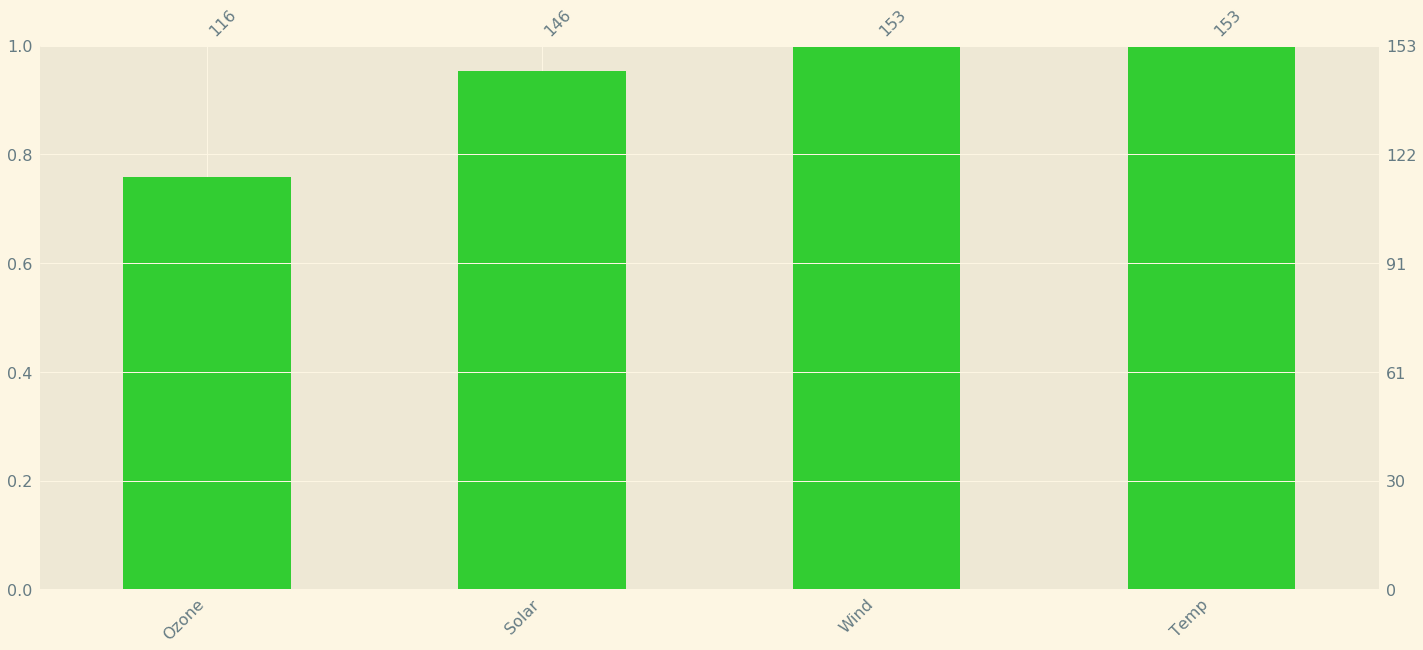

In [13]:
# Plot amount of missingness in the DataFrame
msno.bar(
    df,
    figsize=(24, 10),
    fontsize=16,
    labels=None,
    log=False,
    color='limegreen',
    inline=False,
    filter=None,
    n=0,
    p=0,
    sort=None,
    ax=None
)

plt.show()


> Plot the nullity matrix of df

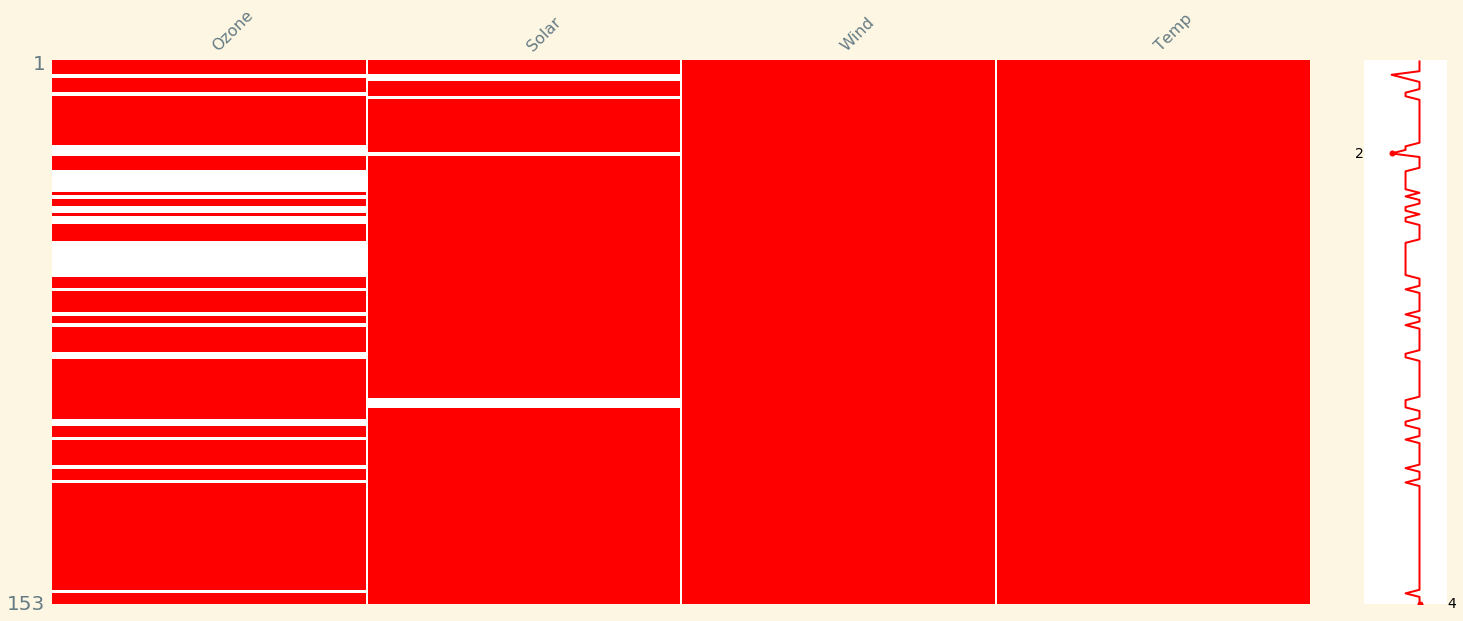

In [14]:
# Plot nullity matrix of df
msno.matrix(
    df=df,
    filter=None,
    n=0,
    p=0,
    sort=None,
    figsize=(25, 10),
    width_ratios=(15, 1),
    color=(1,0,0),
    fontsize=16,
    labels=None,
    sparkline=True,
    inline=False,
    freq=None,
    ax=None,
)

plt.show()


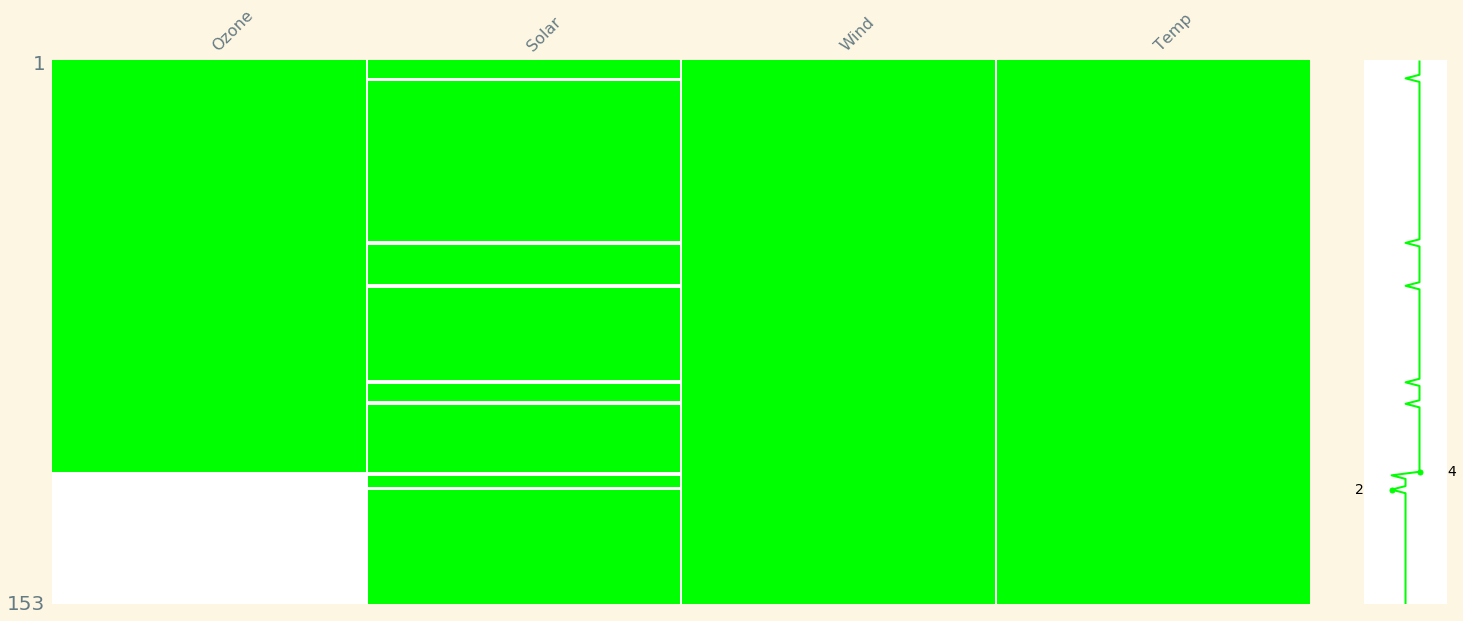

In [15]:
# Sort dataframe df on 'Ozone'
sorted_values = df.sort_values(by=['Ozone'])

# Visualize the missingness summary of sorted
msno.matrix(
    sorted_values,
    filter=None,
    n=0,
    p=0,
    sort=None,
    figsize=(25, 10),
    width_ratios=(15, 1),
    color=(0,1,0),
    fontsize=16,
    labels=None,
    sparkline=True,
    inline=False,
    freq=None,
    ax=None,
)

plt.show()

> Correlations Between Missing Data (Missingness)

> Remember we could find correlations between missing data and it helps us to gain a deeper understanding of the type of missing data.
> It also provides suitable ways in which the missing values can be addressed.


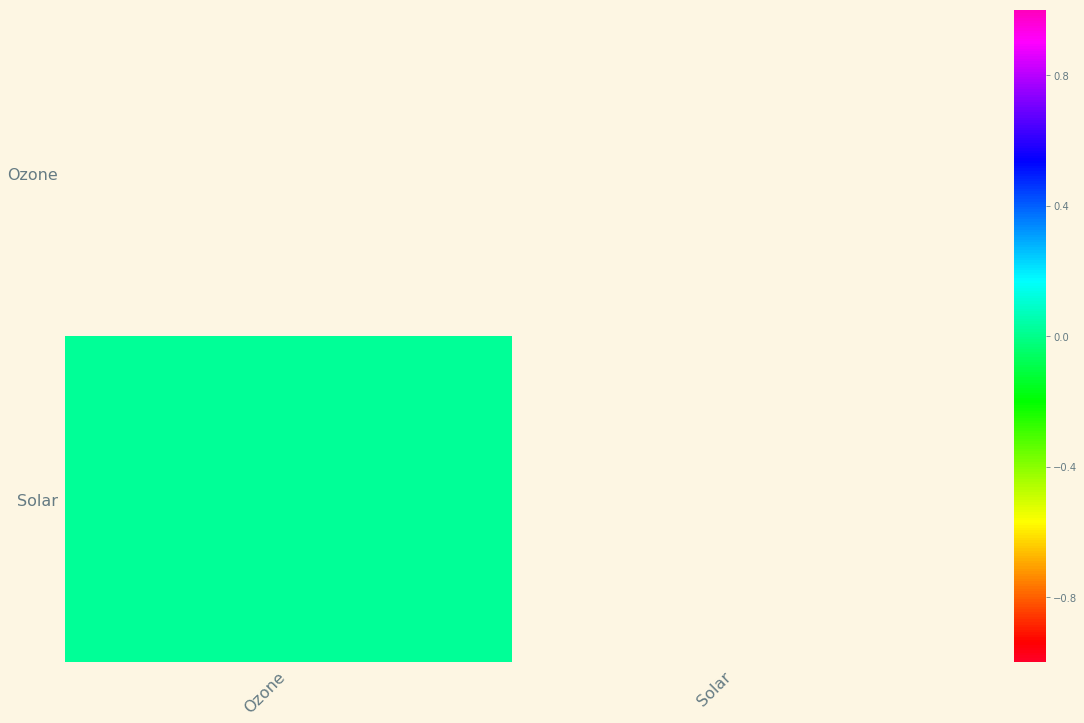

In [16]:
# Plot missingness heatmap of DataFrame df
msno.heatmap(
    df,
    inline=False,
    filter=None,
    n=0,
    p=0,
    sort=None,
    figsize=(20, 12),
    fontsize=16,
    labels=True,
    cmap='gist_rainbow',
    vmin=-1,
    vmax=1,
    cbar=True,
    ax=None,
)

# Show plot
plt.show()

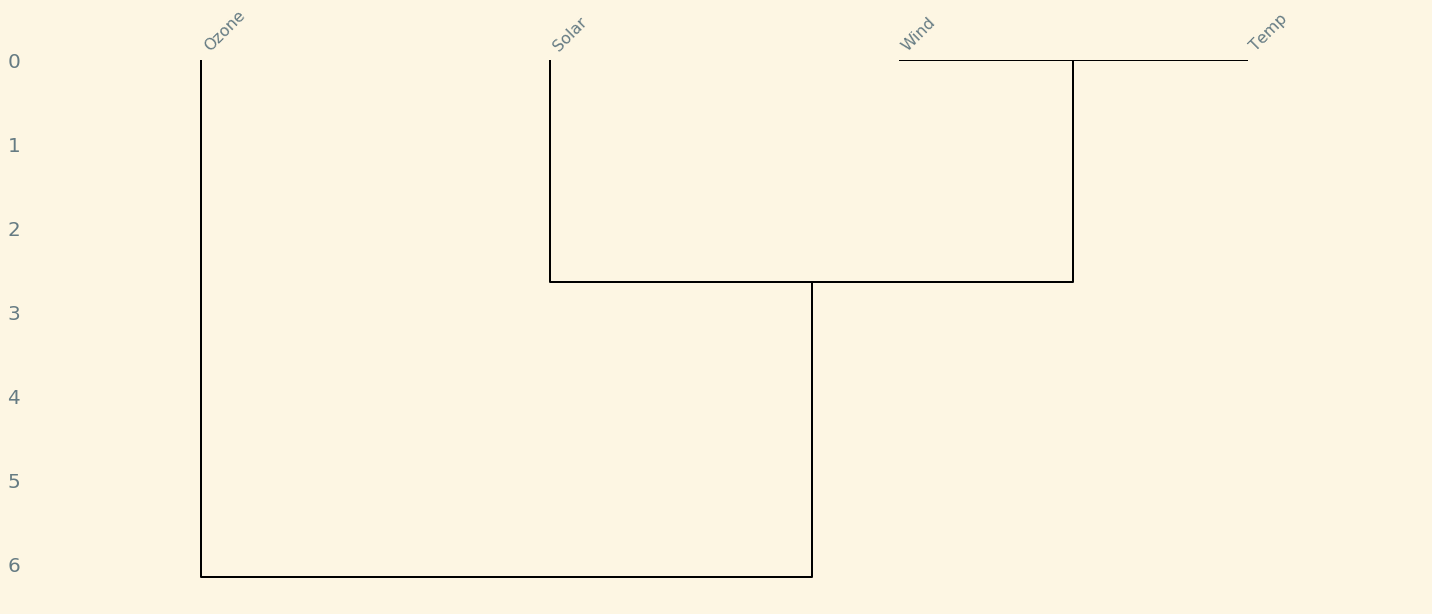

In [17]:
# Plot missingness dendrogram of DataFrame df
msno.dendrogram(
    df,
    method='average',
    filter=None,
    n=0,
    p=0,
    orientation=None,
    figsize=None,
    fontsize=16,
    inline=False,
    ax=None,
)

# Show plot
plt.show()

> More topics: 
    Writing useful functions

In [18]:
import numpy as np
from numpy.random import rand

# Write a function that automates creating dummy values for missing data
def fill_dummy_values(df, scaling_factor=0.075):
    df_dummy = df.copy(deep=True)
    for col_name in df_dummy:
        
        # Get column
        col = df_dummy[col_name]
        col_null = col.isnull()  
        # Calculate number of missing values in column 
        num_nulls = col_null.sum()
        # Calculate column range
        col_range = col.max() - col.min()
        # Shift dummy values to -2 and -1 , Remember rand generates values between 0 and 1
        dummy_values = (rand(num_nulls) - 2) 
        # Scale dummy variables by scaling_factor and shift them towards col.min
        dummy_values = dummy_values * scaling_factor * col_range + col.min()
        
        # Return dummy values
        col[col_null] = dummy_values
    return df_dummy

> Generate scatter plot with missingness

> Let's find interaction between Ozone and Solar

C:\DataScience\Anaconda\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\DataScience\Anaconda\lib\site-packages\pandas\core\computation\expressions.py:194: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  op=op_str, alt_op=unsupported[op_str]


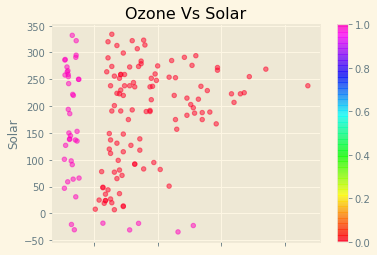

In [19]:
# Fill dummy values in air_quality_dummy
air_quality_dummy = fill_dummy_values(df)

# Sum the nullity of Ozone and Solar (for coloring)
nullity_Ozone_Solar = df.Ozone.isnull() + df.Solar.isnull()

# Create a scatter plot of Ozone and Solar 
air_quality_dummy.plot(
    x='Ozone', 
    y='Solar', 
    kind='scatter', 
    alpha=0.5,
    # Set color to nullity of Ozone and Solar
    c=nullity_Ozone_Solar, 
    colormap='gist_rainbow',
    title='Ozone Vs Solar'    
)

plt.show()

> Excellent! Now from above plot, lets make sure that we take a close look at how the missing values of Ozone and Solar interact with eachther. We dont see any specfic corelation between these two variables that is of missingness of Skin_Insulin and BMI.

> Remember:
    
    Imputing time-series data requires a specialized treatment. 
    Time-series data usually comes with special characteristics such trend, seasonality and cyclicality of which we can exploit when imputing missing values in the data.
    Our air quality DataFrame, do observe these characteristics. 
    Our goal is to impute the values in such a way that these characteristics are accounted for.

In [20]:
# Print prior to imputing missing values
print(df[30:40])

            Ozone  Solar  Wind  Temp
Date                                
1976-05-31   37.0  279.0   7.4    76
1976-01-06    NaN  286.0   8.6    78
1976-02-06    NaN  287.0   9.7    74
1976-03-06    NaN  242.0  16.1    67
1976-04-06    NaN  186.0   9.2    84
1976-05-06    NaN  220.0   8.6    85
1976-06-06    NaN  264.0  14.3    79
1976-07-06   29.0  127.0   9.7    82
1976-08-06    NaN  273.0   6.9    87
1976-09-06   71.0  291.0  13.8    90


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001CE2D828D68>,
      dtype=object)

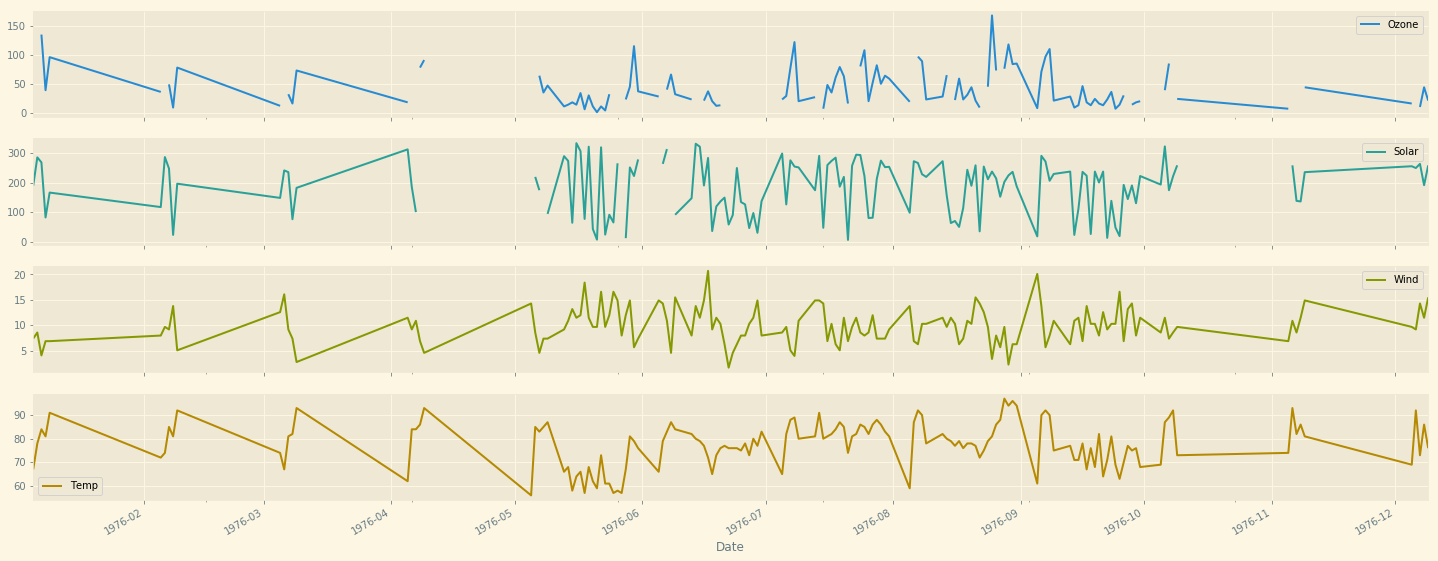

In [21]:
# Make plots of DataFrame using matplotlib / pylab.
df.plot(subplots=True, figsize=(25,10), kind='line')

> Impute missing values into DataFrame using the forward fill method.

In [22]:
# Fill NaNs using forward fill
df_ffill = df.fillna(method='ffill', inplace=False)

In [23]:
# Print after imputing missing values
print(df_ffill[30:40])

            Ozone  Solar  Wind  Temp
Date                                
1976-05-31   37.0  279.0   7.4    76
1976-01-06   37.0  286.0   8.6    78
1976-02-06   37.0  287.0   9.7    74
1976-03-06   37.0  242.0  16.1    67
1976-04-06   37.0  186.0   9.2    84
1976-05-06   37.0  220.0   8.6    85
1976-06-06   37.0  264.0  14.3    79
1976-07-06   29.0  127.0   9.7    82
1976-08-06   29.0  273.0   6.9    87
1976-09-06   71.0  291.0  13.8    90


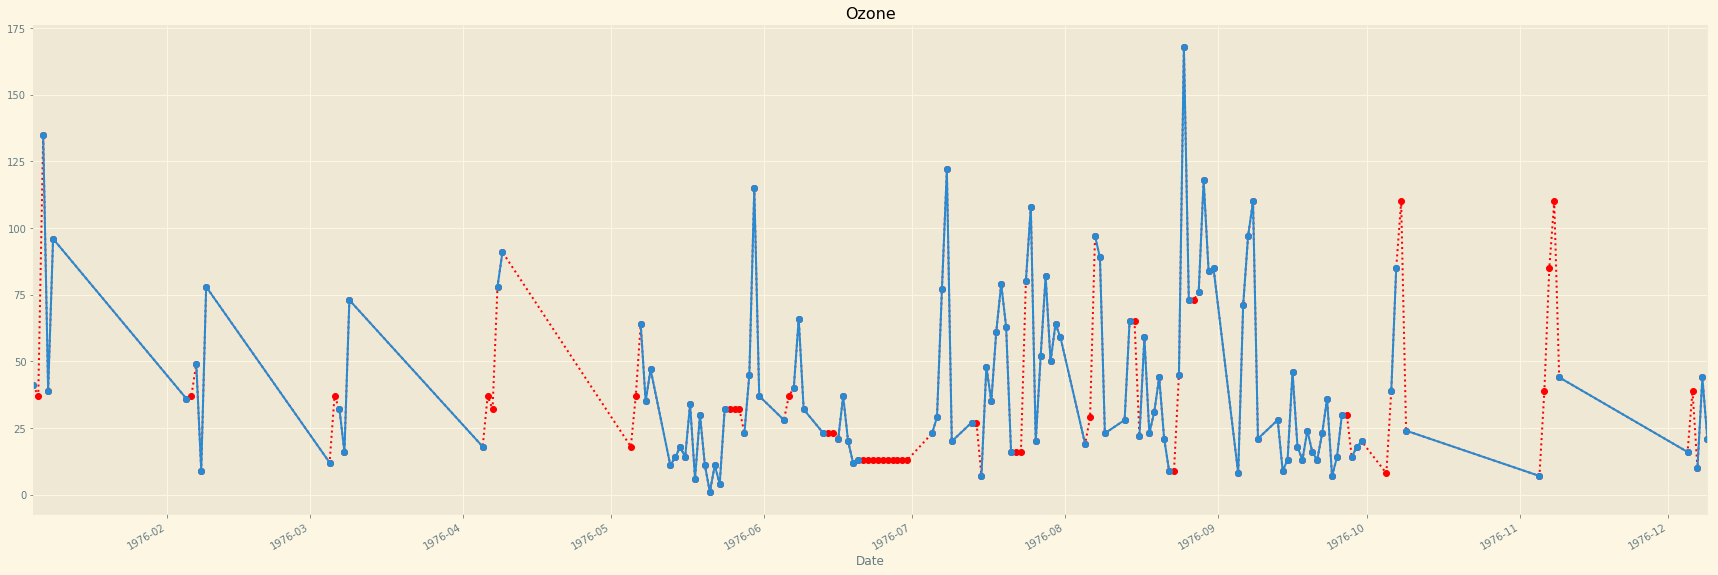

In [24]:
# Make plots of DataFrame using matplotlib / pylab.
df_ffill['Ozone'].plot(figsize=(30,10), color='red', marker='o', linestyle='dotted')
df['Ozone'].plot(title='Ozone', marker='o')

"""

We can observe that forward fill is not at par with the required imputations. 
We will need to further explore other approaches to impute the data!

"""

> Impute missing values using the backward fill method.

In [25]:
# Fill NaNs using backward fill
df_bfill = df.fillna(method='bfill', inplace=False)

In [26]:
# Print after imputing missing values
print(df_bfill[30:40])

            Ozone  Solar  Wind  Temp
Date                                
1976-05-31   37.0  279.0   7.4    76
1976-01-06   29.0  286.0   8.6    78
1976-02-06   29.0  287.0   9.7    74
1976-03-06   29.0  242.0  16.1    67
1976-04-06   29.0  186.0   9.2    84
1976-05-06   29.0  220.0   8.6    85
1976-06-06   29.0  264.0  14.3    79
1976-07-06   29.0  127.0   9.7    82
1976-08-06   71.0  273.0   6.9    87
1976-09-06   71.0  291.0  13.8    90


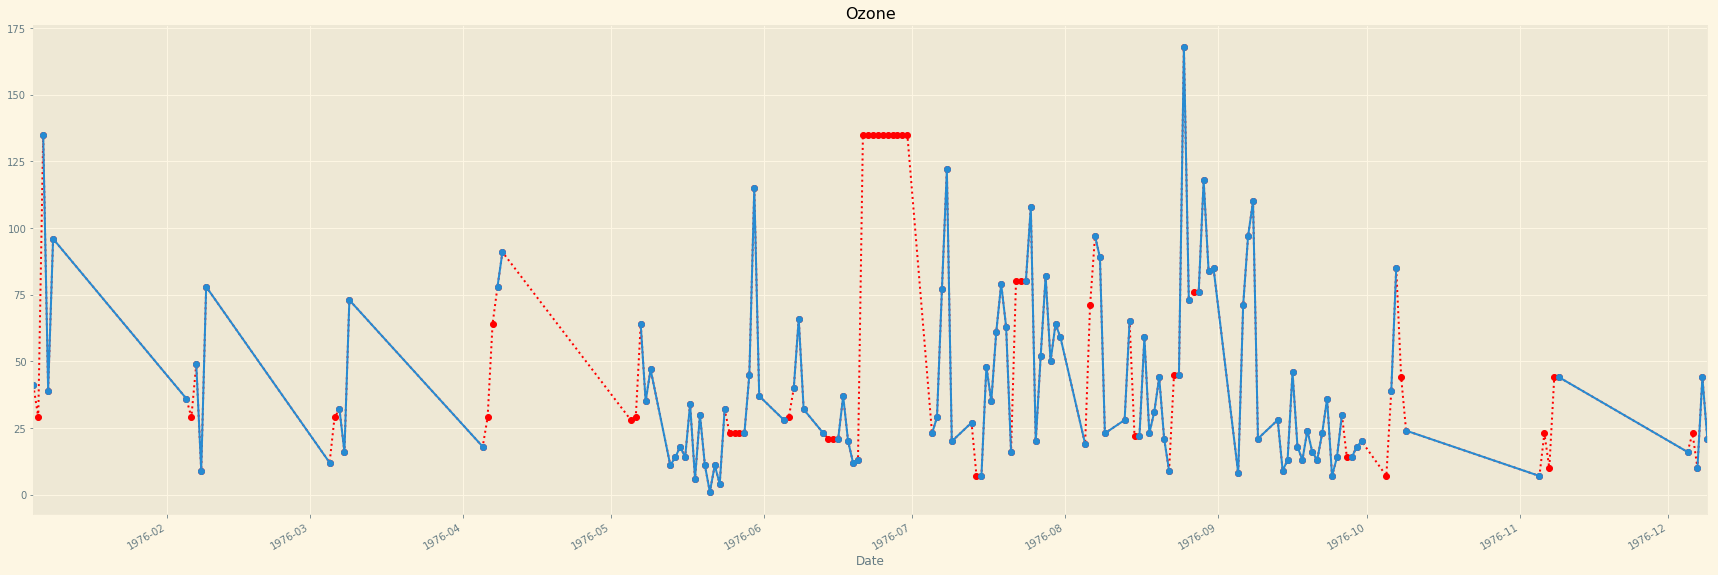

In [27]:
# Make plots of DataFrame using matplotlib / pylab.
df_bfill['Ozone'].plot(figsize=(30,10), color='red', marker='o', linestyle='dotted')
df['Ozone'].plot(title='Ozone', marker='o')

"""

Similar to forward fill, we observe that backward fill also does not perform satisfactorily.

Remember:

Time-series data have trends of ups and downs against time. 
Keeping this in view, filling flat series of values using methods like forward fill or backward fill is not suitable. 

A better imputation method would be useful like linear or quadratic imputation, where the values are filled with incrementing or decrementing values.

"""

> Impute with interpolate method

In [28]:
# Print prior to interpolation
print(df[30:40])

            Ozone  Solar  Wind  Temp
Date                                
1976-05-31   37.0  279.0   7.4    76
1976-01-06    NaN  286.0   8.6    78
1976-02-06    NaN  287.0   9.7    74
1976-03-06    NaN  242.0  16.1    67
1976-04-06    NaN  186.0   9.2    84
1976-05-06    NaN  220.0   8.6    85
1976-06-06    NaN  264.0  14.3    79
1976-07-06   29.0  127.0   9.7    82
1976-08-06    NaN  273.0   6.9    87
1976-09-06   71.0  291.0  13.8    90


In [29]:
# Interpolate the NaNs linearly
df_linear_interp = df.interpolate(method='linear', inplace=False)

In [30]:
# Print after interpolation
print(df_linear_interp[30:40])

                Ozone  Solar  Wind  Temp
Date                                    
1976-05-31  37.000000  279.0   7.4    76
1976-01-06  35.857143  286.0   8.6    78
1976-02-06  34.714286  287.0   9.7    74
1976-03-06  33.571429  242.0  16.1    67
1976-04-06  32.428571  186.0   9.2    84
1976-05-06  31.285714  220.0   8.6    85
1976-06-06  30.142857  264.0  14.3    79
1976-07-06  29.000000  127.0   9.7    82
1976-08-06  50.000000  273.0   6.9    87
1976-09-06  71.000000  291.0  13.8    90


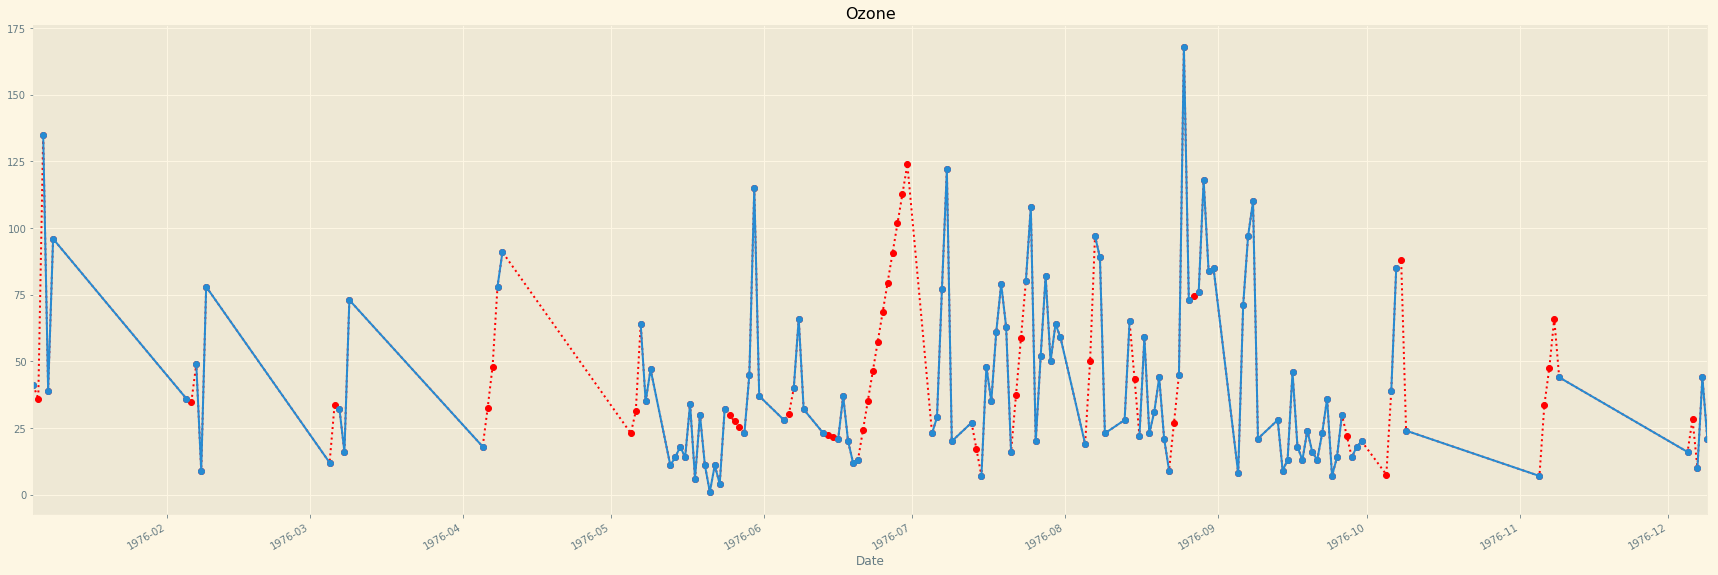

In [31]:
# Make plots of DataFrame using matplotlib / pylab.
df_linear_interp['Ozone'].plot(figsize=(30,10), color='red', marker='o', linestyle='dotted')
df['Ozone'].plot(title='Ozone', marker='o')

In [32]:
# Interpolate the NaNs quadratically
df_quadratic_interp = df.interpolate(method='quadratic', inplace=False)

In [33]:
# Print after interpolation
print(df_quadratic_interp[30:40])

                 Ozone  Solar  Wind  Temp
Date                                     
1976-05-31   37.000000  279.0   7.4    76
1976-01-06  150.292602  286.0   8.6    78
1976-02-06   56.169863  287.0   9.7    74
1976-03-06   29.602100  242.0  16.1    67
1976-04-06   37.266678  186.0   9.2    84
1976-05-06   97.488096  220.0   8.6    85
1976-06-06   29.351510  264.0  14.3    79
1976-07-06   29.000000  127.0   9.7    82
1976-08-06   61.852909  273.0   6.9    87
1976-09-06   71.000000  291.0  13.8    90


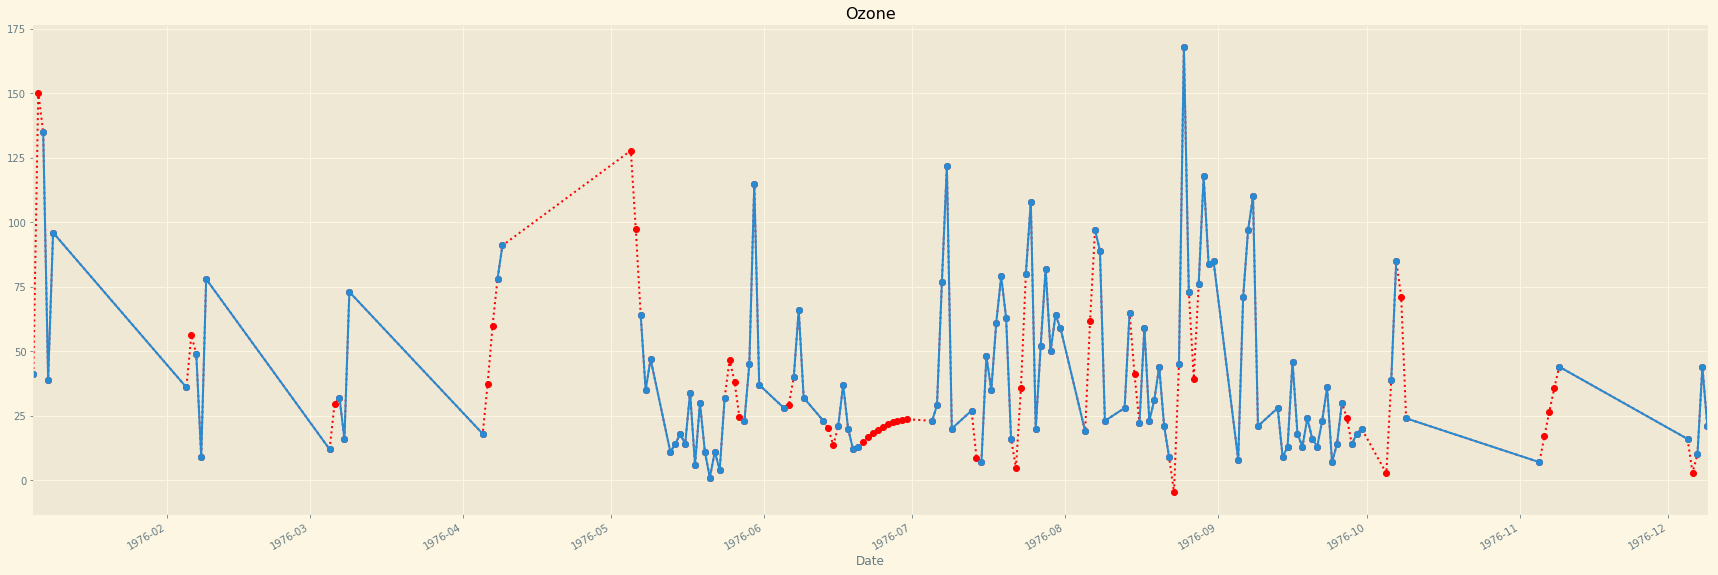

In [34]:
# Make plots of DataFrame using matplotlib / pylab.
df_quadratic_interp['Ozone'].plot(figsize=(30,10), color='red', marker='o', linestyle='dotted')
df['Ozone'].plot(title='Ozone', marker='o')

In [35]:
# Interpolate the NaNs with nearest value
df_nearest_interp = df.interpolate(method='nearest', inplace=False)

In [36]:
# Print after interpolation
print(df_nearest_interp[30:40])

            Ozone  Solar  Wind  Temp
Date                                
1976-05-31   37.0  279.0   7.4    76
1976-01-06   41.0  286.0   8.6    78
1976-02-06   36.0  287.0   9.7    74
1976-03-06   12.0  242.0  16.1    67
1976-04-06   18.0  186.0   9.2    84
1976-05-06   64.0  220.0   8.6    85
1976-06-06   28.0  264.0  14.3    79
1976-07-06   29.0  127.0   9.7    82
1976-08-06   19.0  273.0   6.9    87
1976-09-06   71.0  291.0  13.8    90


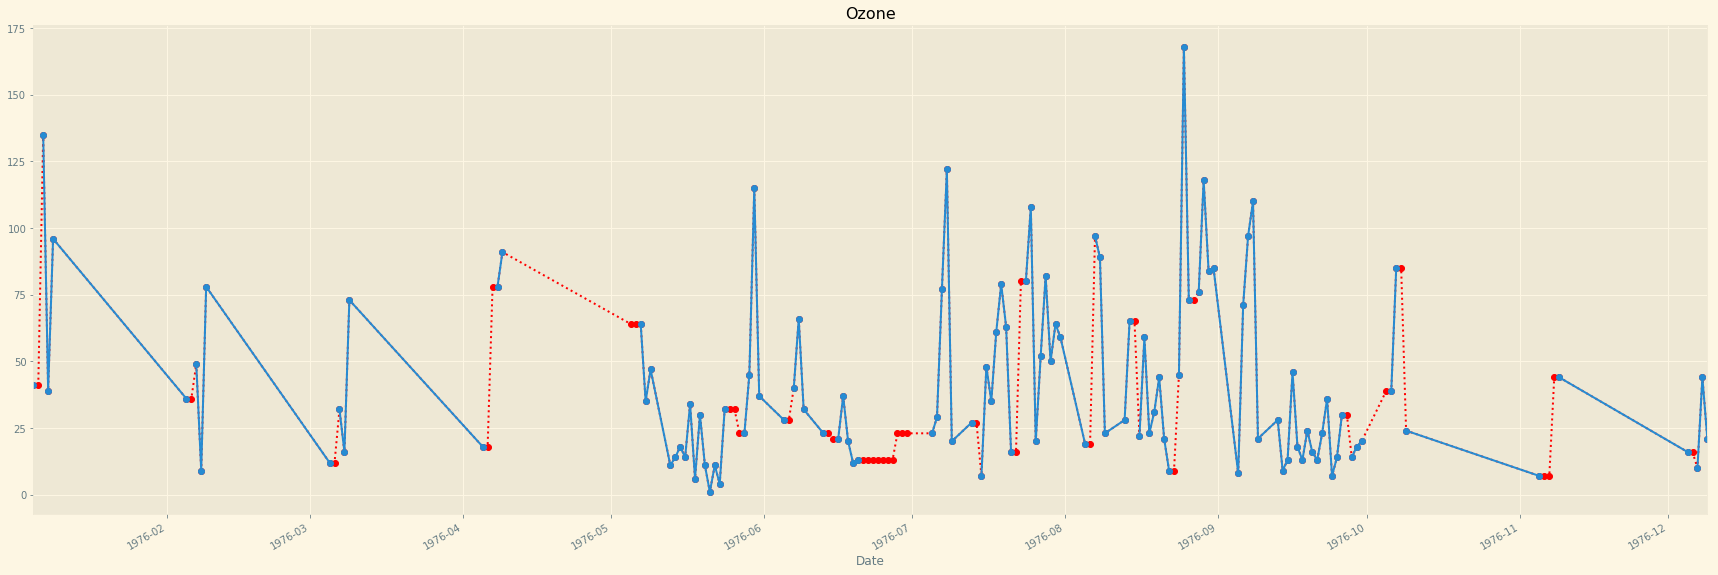

In [37]:
# Make plots of DataFrame using matplotlib / pylab.
df_nearest_interp['Ozone'].plot(figsize=(30,10), color='red', marker='o', linestyle='dotted')
df['Ozone'].plot(title='Ozone', marker='o')

> > Comparison Of The Interpolations

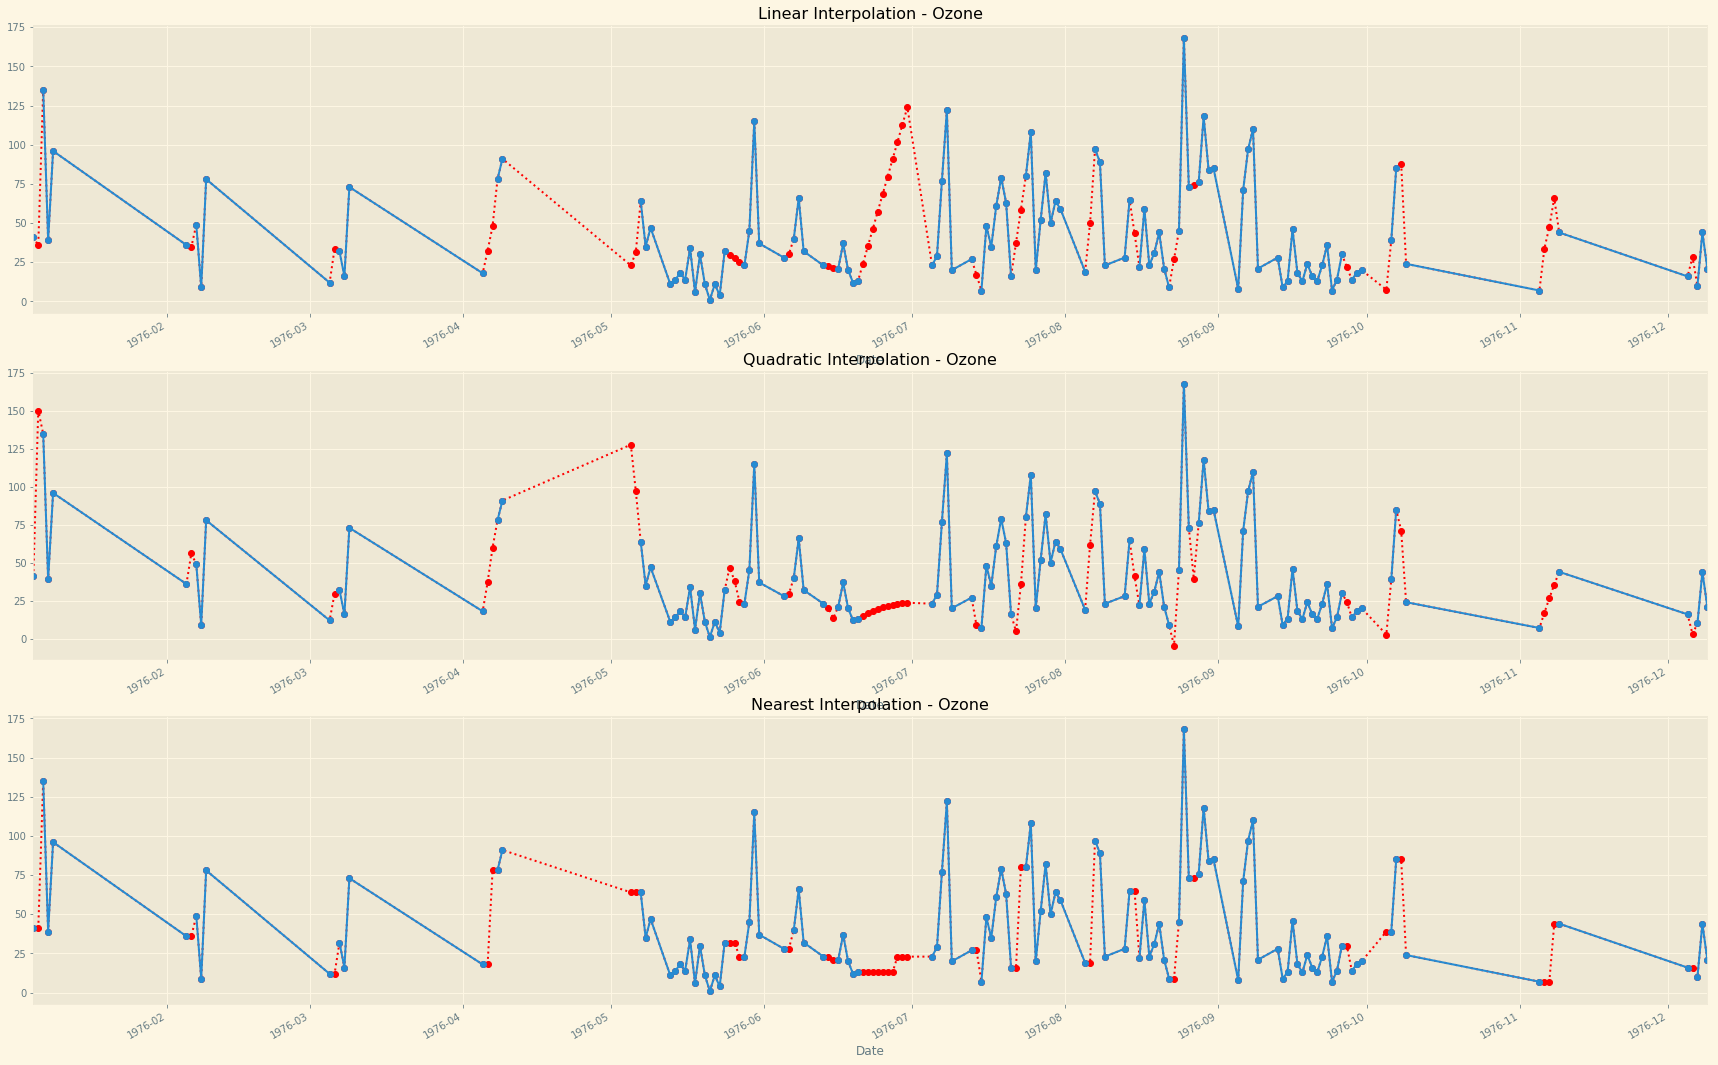

In [38]:
# Create subplots
fig, axes = plt.subplots(3,1, figsize=(30,20))

# Create interpolations dictionary
interpolations = {
    'Linear Interpolation': df_linear_interp,
    'Quadratic Interpolation': df_quadratic_interp,
    'Nearest Interpolation': df_nearest_interp
}

# Visualize each interpolation
for ax, df_key in zip(axes, interpolations):
    interpolations[df_key].Ozone.plot(
        color='red', 
        marker='o', 
        linestyle='dotted', 
        ax=ax
    )
    
    df.Ozone.plot(title=df_key +' - Ozone', 
                  marker='o', 
                  ax=ax 
                 )

> Comparison of Imputation Strategies

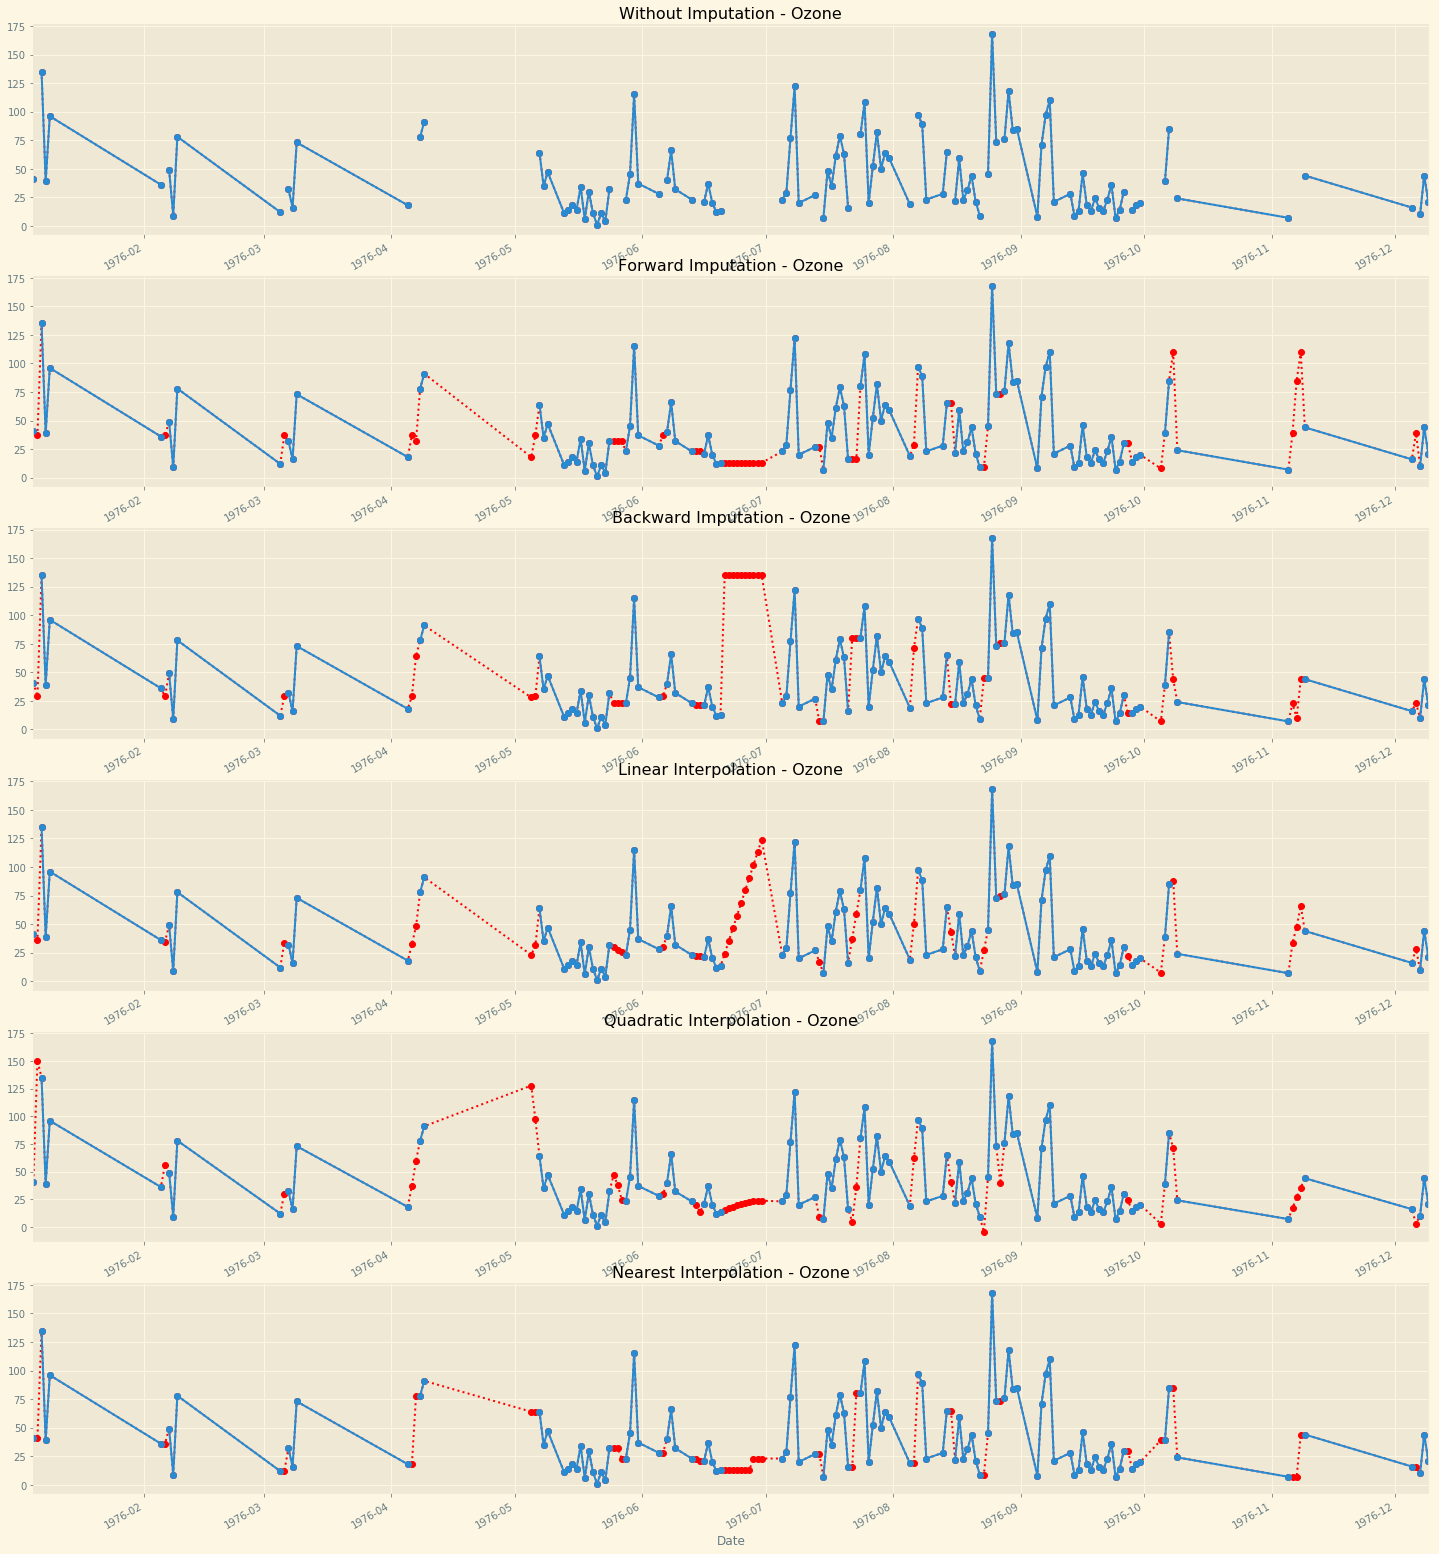

In [39]:
# Create subplots
fig, axes = plt.subplots(nrows =6, ncols=1, figsize=(25,30))

# Create interpolations dictionary
interpolations = {
    'Without Imputation': df,
    'Forward Imputation': df_ffill,
    'Backward Imputation': df_bfill,
    'Linear Interpolation': df_linear_interp,
    'Quadratic Interpolation': df_quadratic_interp,
    'Nearest Interpolation': df_nearest_interp
}

# Visualize each interpolation by looping over axes and interpolations
for ax, df_key in zip(axes, interpolations):
    # Select and also set the title for a DataFrame
    interpolations[df_key].Ozone.plot(color='red', marker='o', linestyle='dotted', ax=ax)
    df.Ozone.plot(title=df_key + ' - Ozone', marker='o', ax=ax)

plt.show()

>>> Want to know more on Advanced Imputation Strategies, please stay tunned with us 